<a href="https://colab.research.google.com/github/yashvyas1405/helloworld/blob/master/AI_Dockship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
train = pd.read_csv('TRAIN.csv')

In [83]:
train.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            38563 non-null  object 
 1   holiday              38563 non-null  object 
 2   temp                 38563 non-null  float64
 3   rain_1h              38563 non-null  float64
 4   snow_1h              38563 non-null  float64
 5   clouds_all           38563 non-null  int64  
 6   weather_main         38563 non-null  object 
 7   weather_description  38563 non-null  object 
 8   traffic_volume       38563 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.6+ MB


In [85]:
train.isnull().sum()

date_time              0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64

In [86]:
#Date_time column
train['date_time'] = pd.to_datetime(train['date_time'])

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            38563 non-null  datetime64[ns]
 1   holiday              38563 non-null  object        
 2   temp                 38563 non-null  float64       
 3   rain_1h              38563 non-null  float64       
 4   snow_1h              38563 non-null  float64       
 5   clouds_all           38563 non-null  int64         
 6   weather_main         38563 non-null  object        
 7   weather_description  38563 non-null  object        
 8   traffic_volume       38563 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 2.6+ MB


In [88]:
train['Year'] = train['date_time'].dt.year
train['Month'] = train['date_time'].dt.month
train['Day'] = train['date_time'].dt.day
train['Hour'] = train['date_time'].dt.hour
train['Minutes'] = train['date_time'].dt.minute
train['Seconds'] = train['date_time'].dt.second

In [89]:
# Eliminating date time
train.drop(['date_time'], axis = 1, inplace = True)

In [90]:
train.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Year,Month,Day,Hour,Minutes,Seconds
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9,0,0
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10,0,0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11,0,0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12,0,0
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13,0,0


In [91]:
#Categorical variables = holiday, weather main, weather description
num_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']


EDA

In [92]:
import seaborn as sns

<Figure size 1440x2880 with 0 Axes>

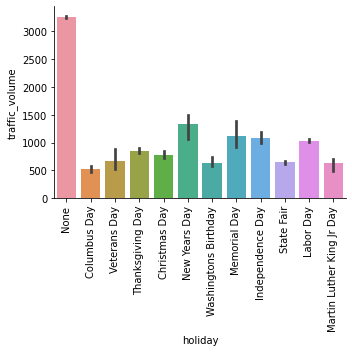

In [93]:
plt.figure(figsize=(20,40))
sns.catplot(y="traffic_volume", x="holiday",
                 data=train, kind="bar")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

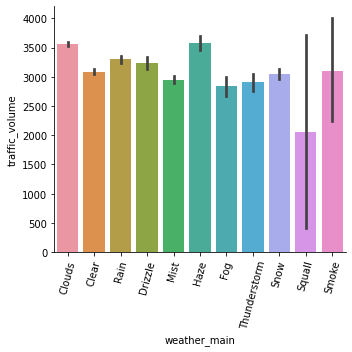

In [94]:
plt.figure(figsize=(20,10))
sns.catplot(y="traffic_volume", x="weather_main",
                 data=train, kind="bar")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

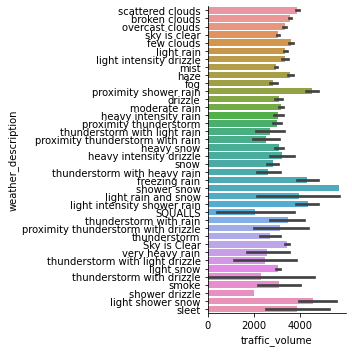

In [95]:
fig_dims =(20,4) 
sns.catplot(y="weather_description", x="traffic_volume",
                 data=train, kind="bar")
plt.tight_layout()
plt.show()

Numerical Variables

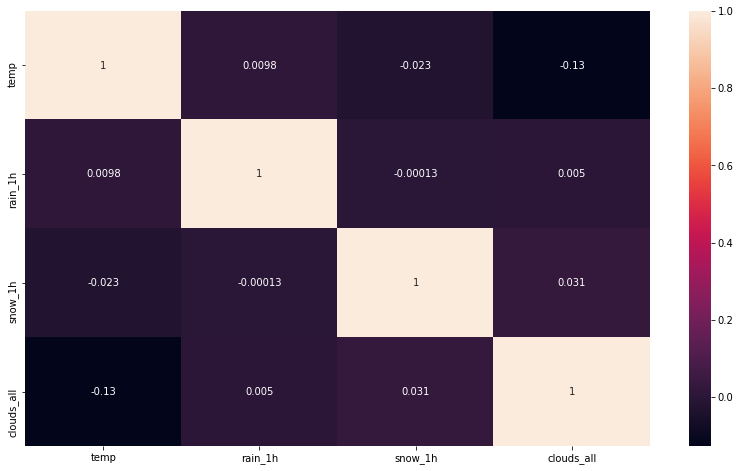

In [96]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols].corr(), annot=True)